### Nadgledano učenje - Klasifikacija kvaliteta belog vina

#### Studenti:
    Đurađ Gvozdenović 1329
    Vesna Stojanović 1339

### Tema: Predviđanje kvaliteta belog vina

Korišćeni data set se nalazi na sledećem linku: https://archive.ics.uci.edu/ml/datasets/wine+quality.


## Importovanje potrebnih paketa za rad sa algoritmima nadgledanog učenja

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors

## Ucitavanje skupa podataka

In [6]:
data_df = pd.read_csv('winequality-white.csv', sep=";")

## Deskriptivna analiza podataka

In [7]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [182]:
data_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## Provera nedefinisanih vrednosti

In [48]:
def check_missing_vals(data):
    missing_vals = data.isna().sum()
    print(missing_vals)
    return missing_vals.sum() != 0

print("Missing values?:", check_missing_vals(data_df))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Missing values?: False


## Histogrami

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

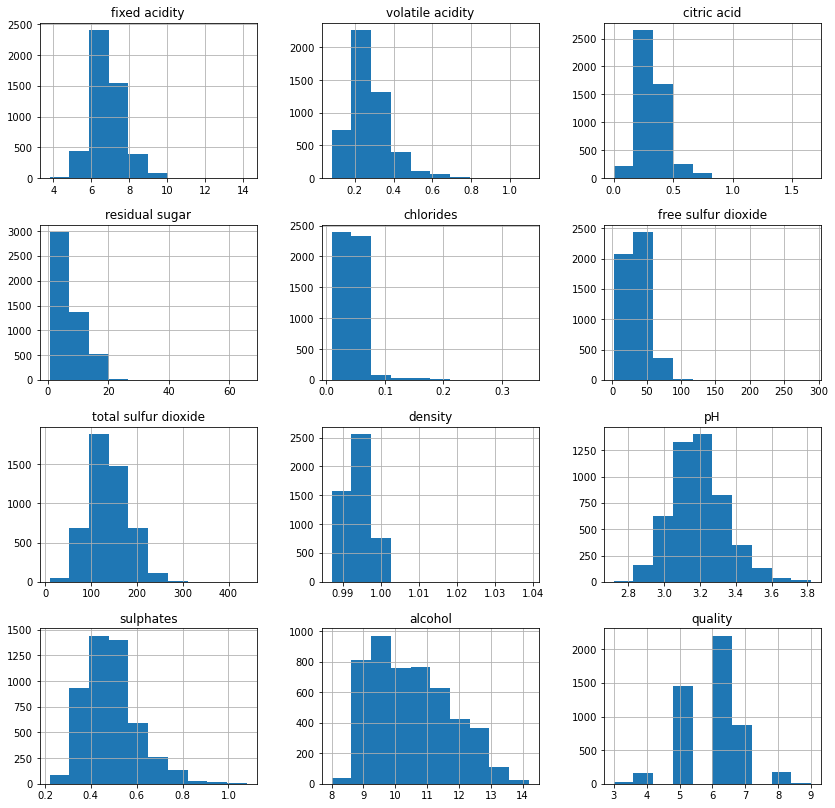

In [50]:
data_df.hist(figsize=(14,14))

### Ispitivanje normalne raspodele

Mtode primenjene u nastavku preuzete iz sledećeg materijala: https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

#### Kolmogorov Smirnov test

In [20]:
for i in range(11):
    ks_statistic, p_value = kstest(data_df.iloc[:, i], 'norm')
    print([ks_statistic, p_value])

[0.9999276519560749, 0.0]
[0.5408168172006574, 0.0]
[0.5279035695262004, 0.0]
[0.8294217299886929, 0.0]
[0.5049725145855052, 0.0]
[0.9984459370030779, 0.0]
[1.0, 0.0]
[0.8382056420155723, 0.0]
[0.9967888554366511, 0.0]
[0.6072948439937709, 0.0]
[0.9999999999999993, 0.0]


#### Lilliefos test

In [5]:
for i in range(11):
    shapiro_test = shapiro(data_df.iloc[:, i])
    print(shapiro_test)

ShapiroResult(statistic=0.9765732288360596, pvalue=1.166787004876594e-27)
ShapiroResult(statistic=0.9045485258102417, pvalue=0.0)
ShapiroResult(statistic=0.9222351312637329, pvalue=9.80908925027372e-45)
ShapiroResult(statistic=0.8845692873001099, pvalue=0.0)
ShapiroResult(statistic=0.5908079147338867, pvalue=0.0)
ShapiroResult(statistic=0.942058801651001, pvalue=3.83382648153091e-40)
ShapiroResult(statistic=0.9890114665031433, pvalue=4.353979925482853e-19)
ShapiroResult(statistic=0.9548044204711914, pvalue=1.780302839504033e-36)
ShapiroResult(statistic=0.9881061911582947, pvalue=6.633951677288629e-20)
ShapiroResult(statistic=0.9516041874885559, pvalue=1.815453234390911e-37)
ShapiroResult(statistic=0.955296516418457, pvalue=2.5578040326544056e-36)


#### Shapiro Wilk test

In [6]:
for i in range(11):
    lillie_fors = lilliefors(data_df.iloc[:, i])
    print(lillie_fors)

(0.06623226906341861, 0.0009999999999998899)
(0.10451281701264592, 0.0009999999999998899)
(0.11275019476770354, 0.0009999999999998899)
(0.1366235984083533, 0.0009999999999998899)
(0.20726261110356592, 0.0009999999999998899)
(0.057681703550689356, 0.0009999999999998899)
(0.04465002538900975, 0.0009999999999998899)
(0.05221027022348934, 0.0009999999999998899)
(0.049268561212092554, 0.0009999999999998899)
(0.08684995943386564, 0.0009999999999998899)
(0.09157331861812912, 0.0009999999999998899)


## Analiza uticaja atributa na taget value
metodi preuzeti iz materijala sa linka : https://towardsdatascience.com/3-feature-selection-techniques-of-scikit-learn-c9a5f7eb7364

### VarianceThreshold

In [4]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e quality
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_f,y_f)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_f.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs        Score
6   total sulfur dioxide  3358.298433
5    free sulfur dioxide   947.712845
3         residual sugar   501.235224
10               alcohol   155.078234
1       volatile acidity    12.622636
0          fixed acidity     7.922042
4              chlorides     2.529005
2            citric acid     0.851118
9              sulphates     0.579206
8                     pH     0.428745


### Recursive Feature Elimination

Ova metoda se bazira na funkcionalnosti ugradjenoj u klasifikatore bazirane na stablima. Pre svega se trenira model sa celim dataset-om, nakon cega se izbacuju feature-i koji imaju najmanji znacaj. Nakon toga se trenira model sa preostalim feature-ima, a ceo proces se ponavlja sve dok ne ostane željeni broj feature-a u dataset-u.

[0.07899499 0.09942982 0.0842305  0.08639882 0.08352172 0.09069774
 0.08798209 0.09371476 0.0843289  0.08333512 0.12736555]


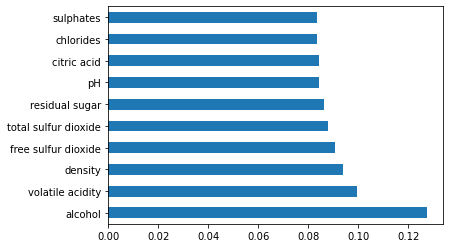

In [5]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e quality
model = ExtraTreesClassifier()
model.fit(X_f,y_f)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_f.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Hitmapa matrice korelacija atributa

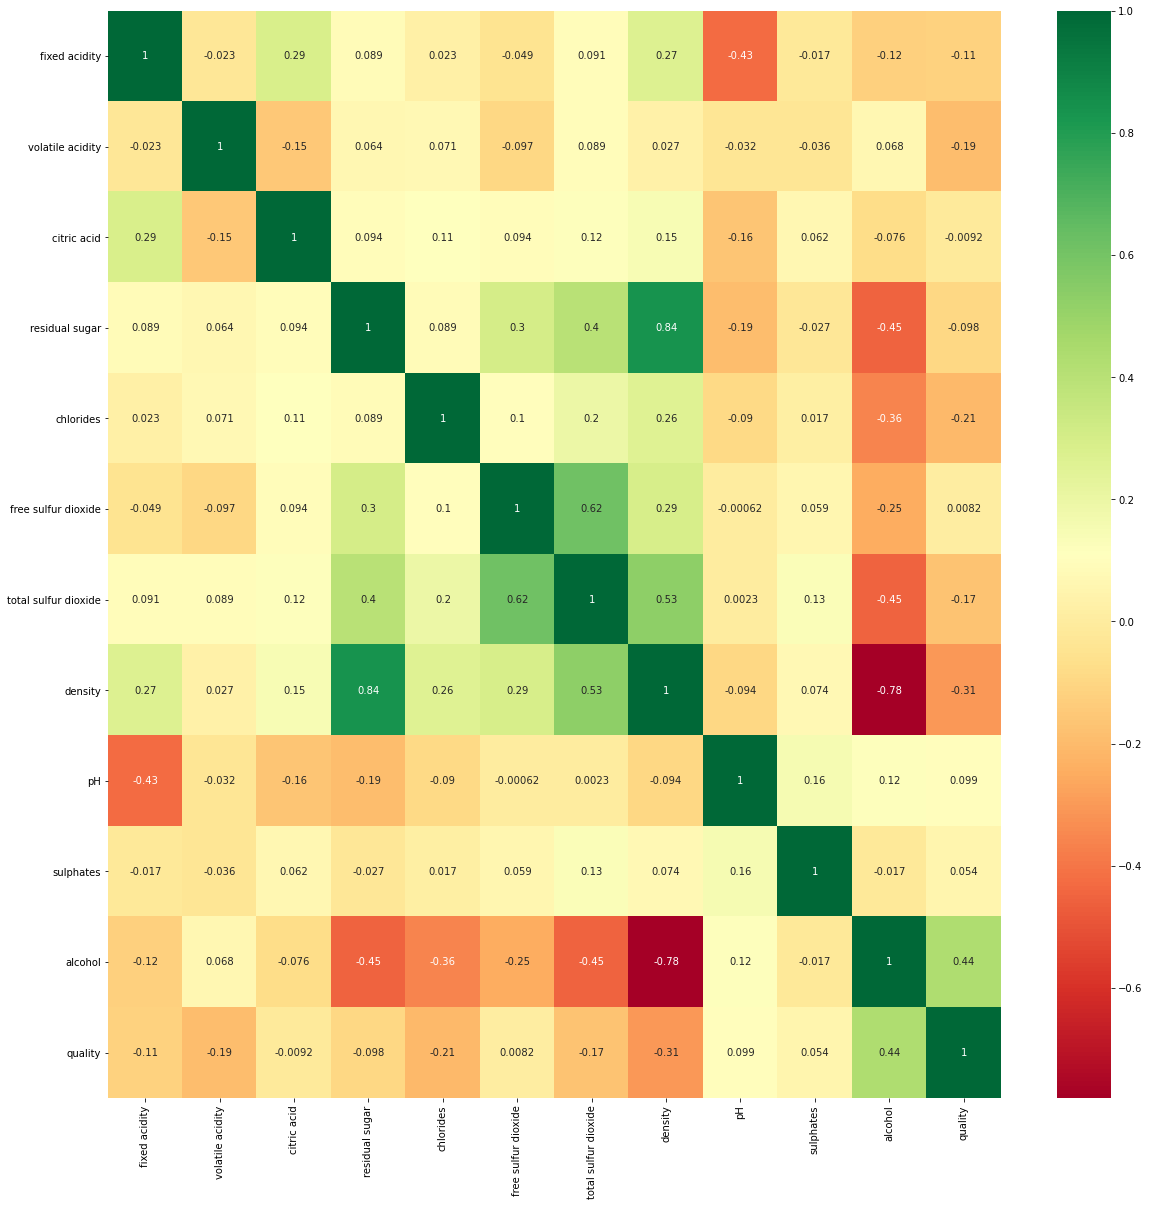

In [8]:
X_f = data_df.iloc[:,0:11]  #independent columns
y_f = data_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### box plot

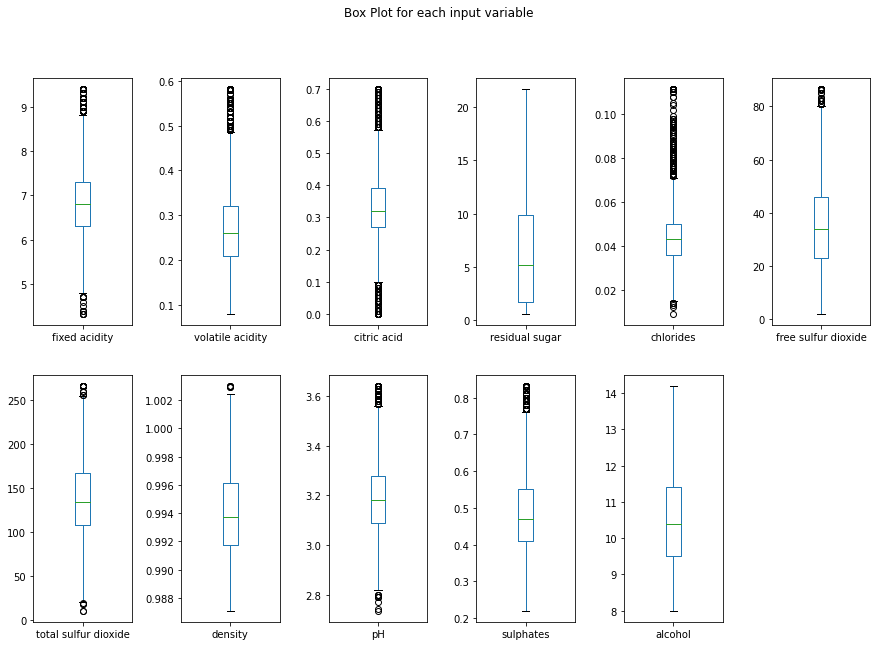

In [106]:
def plot_boxplot(data):
    data_df.drop('quality', axis=1).plot(kind='box', figsize=(15, 10), subplots=True, layout=(2, 6),
                                      sharex=False, sharey=False,
                                      title='Box Plot for each input variable')
    plt.subplots_adjust(wspace=0.5)
    
plot_boxplot(data_df)

## Balansiranje skupa podataka

Na osnovu histograma quality atributa sa slike ispod moze se videti da u dataset-u postoje velike varijacije u broju instanci jedne klase. Moguca su dva resenja za balansiranje ovakvog dataset-a.
Pristup sa tri klase - svodjenje klasa sa opsega [0,10] na opseg [0,1,2]([lose, srednje, dobro])
Pristup sa dve klase - svodjenje klasa sa opsega [0,10] na opes [0,1]([lose, dobro]) i,

<AxesSubplot:>

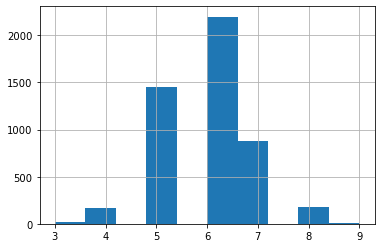

In [28]:
data_df.iloc[:,-1].hist()

### Pristup sa 3 klase
Sve klase koje imaju vrednost manju od 6 postaju klasa 0, klasa 6 postaje klasa 1, a sve klase sa vrednoscu vecom od 6 postaju klasa 2. Nakon sto je su promenjene vrednosti klasama neke instance iz klasa 0 i 2 su duplirane kako bi se postigao jednak broj instanci za sve 3 klase.

In [52]:
data_df_3c = data_df.copy()
for i in range(len(data_df_3c)):    
    if data_df_3c.iloc[i, -1] == 6:
        data_df_3c.iloc[i, -1] = 1
    elif data_df_3c.iloc[i, -1] < 6:
        data_df_3c.iloc[i, -1] = 0
    else:
        data_df_3c.iloc[i, -1] = 2

In [53]:
length_difference_1_2 = len(data_df_3c[(data_df_3c.quality==1)]) - len(data_df_3c[(data_df_3c.quality==2)])
length_difference_1_0 = len(data_df_3c[(data_df_3c.quality==1)]) - len(data_df_3c[(data_df_3c.quality==0)])
data_df_3c = pd.concat([data_df_3c[(data_df_3c.quality==0)].iloc[:length_difference_1_0, :], data_df_3c])
class_2_duplicate = pd.concat([data_df_3c[(data_df_3c.quality==2)], data_df_3c[(data_df_3c.quality==2)]])
data_df_3c = pd.concat([class_2_duplicate.iloc[:length_difference_1_2, :], data_df_3c])

<AxesSubplot:>

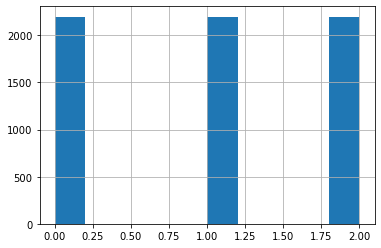

In [54]:
data_df_3c.iloc[:,-1].hist()

### pristup sa 2 klase
Sve klase koje imaju vrednost manju od 6 postaju klasa 0, a sve klase sa vrednoscu vecom od 6 postaju klasa 1. Nakon sto je su promenjene vrednosti klasama neke instance iz klasa 0 su duplirane kako bi se postigao jednak broj instanci za obe klase.

In [55]:
data_df_2c = data_df.copy()
for i in range(len(data_df_2c)):    
    if data_df_2c.iloc[i, -1] < 6:
        data_df_2c.iloc[i, -1] = 0
    else:
        data_df_2c.iloc[i, -1] = 1

In [56]:
length_difference = len(data_df_2c[(data_df_2c.quality==1)]) - len(data_df_2c[(data_df_2c.quality==0)])
data_df_2c = pd.concat([data_df_2c[(data_df_2c.quality==0)].iloc[:length_difference, :], data_df_2c])

<AxesSubplot:>

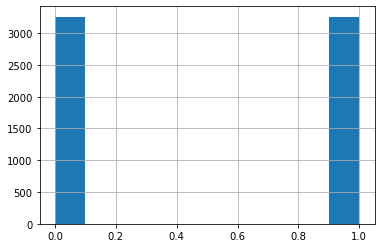

In [57]:
data_df_2c.iloc[:,-1].hist()

## Primena modela klasifikacije
## Pristup sa dve klase
### podela na train i test skupove podataka 


In [38]:
prepared_df = data_df_2c.copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

### SVM

In [13]:
clf = svm.SVC(kernel = "rbf",gamma="auto", C=100, shrinking=False, probability=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       668
           1       0.90      0.81      0.86       636

    accuracy                           0.87      1304
   macro avg       0.87      0.87      0.87      1304
weighted avg       0.87      0.87      0.87      1304



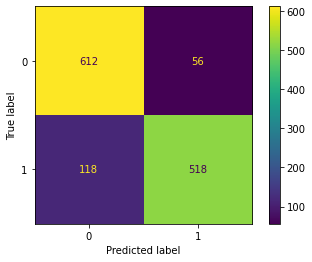

In [15]:
plot_confusion_matrix(clf, X_test, y_test)

### Random forest

In [40]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       658
           1       0.94      0.87      0.91       646

    accuracy                           0.91      1304
   macro avg       0.91      0.91      0.91      1304
weighted avg       0.91      0.91      0.91      1304



In [59]:
X_shuffle, y_shuffle = shuffle(X, y, random_state=2)

scores_accuracy = cross_val_score(rf, X_shuffle, y_shuffle, scoring="accuracy",cv=5, n_jobs=1)
scores_precision = cross_val_score(rf, X_shuffle, y_shuffle, scoring="precision",cv=5, n_jobs=1)
scores_recall = cross_val_score(rf, X_shuffle, y_shuffle, scoring="recall",cv=5, n_jobs=1)
scores_f1 = cross_val_score(rf, X_shuffle, y_shuffle, scoring="f1",cv=5, n_jobs=1)


print(f"accuracy: {scores_accuracy.mean()}")
print(f"precision: {scores_precision.mean()}")
print(f"recall: {scores_recall.mean()}")
print(f"f1: {scores_f1.mean()}")

accuracy: 0.9119090442537041
precision: 0.9524063363344848
recall: 0.8710921376268693
f1: 0.9065063836643897


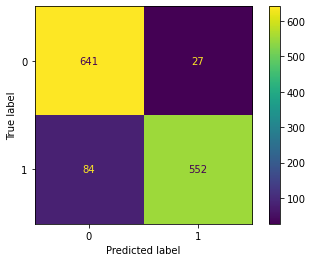

In [17]:
plot_confusion_matrix(rf, X_test, y_test)

### KNN

In [18]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       668
           1       0.91      0.78      0.84       636

    accuracy                           0.86      1304
   macro avg       0.86      0.85      0.85      1304
weighted avg       0.86      0.86      0.85      1304



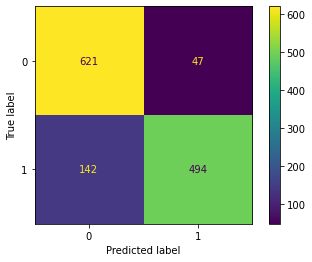

In [19]:
plot_confusion_matrix(knn, X_test, y_test)

### Naive Bayes


In [20]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       668
           1       0.68      0.70      0.69       636

    accuracy                           0.70      1304
   macro avg       0.70      0.70      0.70      1304
weighted avg       0.70      0.70      0.70      1304



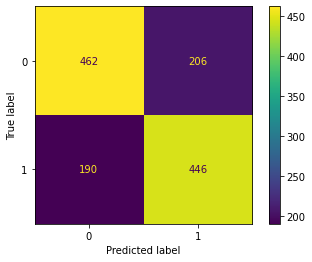

In [21]:
plot_confusion_matrix(gnb, X_test, y_test)

## Pristup sa tri klase



In [22]:
prepared_df = data_df_3c.copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## SVM

In [23]:
clf = svm.SVC(kernel = "rbf",gamma="auto", C=100, shrinking=False, probability=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       424
           1       0.78      0.65      0.71       449
           2       0.83      0.94      0.88       446

    accuracy                           0.80      1319
   macro avg       0.79      0.80      0.79      1319
weighted avg       0.79      0.80      0.79      1319



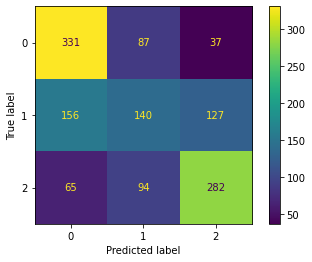

In [97]:
plot_confusion_matrix(clf, X_test, y_test)

### Random forest

In [24]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       424
           1       0.83      0.69      0.75       449
           2       0.85      0.96      0.90       446

    accuracy                           0.84      1319
   macro avg       0.84      0.84      0.83      1319
weighted avg       0.84      0.84      0.83      1319



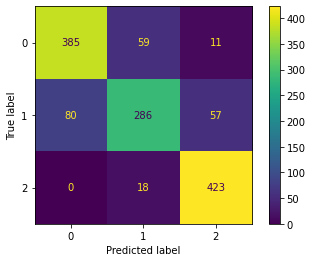

In [99]:
plot_confusion_matrix(rf, X_test, y_test)

### KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       424
           1       0.78      0.65      0.71       449
           2       0.80      0.94      0.86       446

    accuracy                           0.79      1319
   macro avg       0.79      0.79      0.79      1319
weighted avg       0.79      0.79      0.79      1319



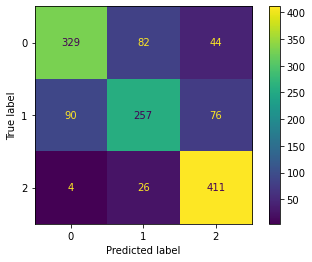

In [101]:
plot_confusion_matrix(knn, X_test, y_test)

### Naive Bayes

In [26]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       424
           1       0.45      0.23      0.31       449
           2       0.52      0.76      0.61       446

    accuracy                           0.53      1319
   macro avg       0.52      0.53      0.51      1319
weighted avg       0.52      0.53      0.50      1319



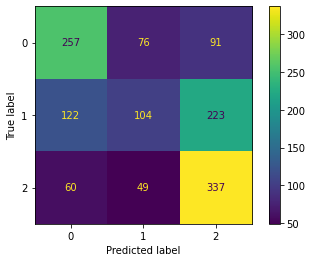

In [27]:
plot_confusion_matrix(gnb, X_test, y_test)

### outlier detection
U primeru ispod prikazane su dve metode sa detekciju outliera: na osnovu IQR-a i 3 standardne devijacije.
IQR - inter kvartilni opseg pretstavlja razliku izmedju vrednostu prbog i treceg kvartila i koristi se kako bi se odredile donja i gorna granica za detekciju outlier-a
standardna devijacija - prosecno odstupanje od prosecne vrednosti. Ukoliko skup podataka ima normalnu raspodelu u intervalu [mean - 3*std, mean + 3*std] naci ce se 99,7% vrednosti. Ovo pravilo je moguce iskoristiti za eliminaciju preostalih 0,3 procenta vrednosti koje pretstavljaju outlier-e.

Prikazani su rezultati obe metode za detekciju outlier-a, IQR-zeleno i 3 std-crveno. Eksperimantalno je utvrdjeno da druga metoda daje bolje rezultate tako da je ona i iskoriscena za eliminaciju outlier-a.

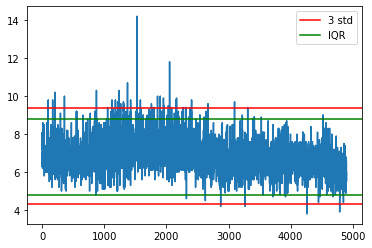

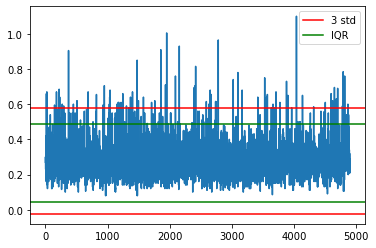

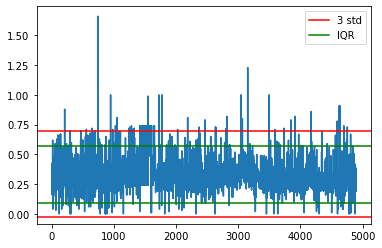

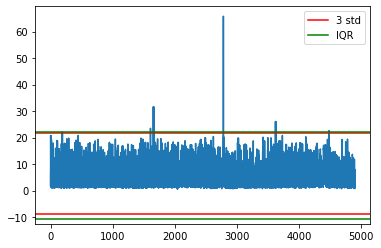

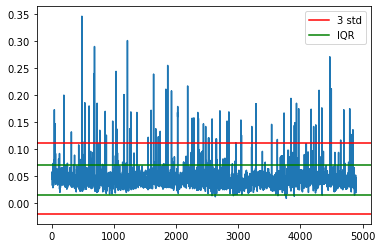

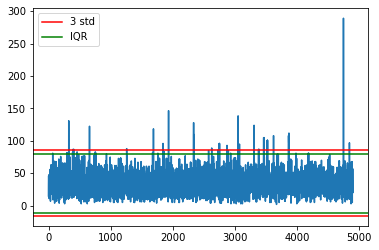

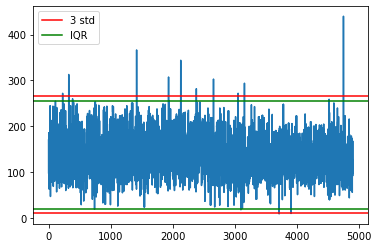

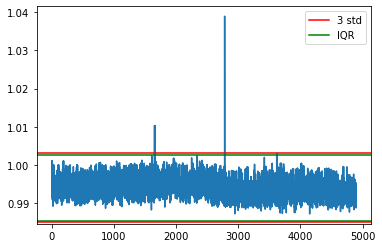

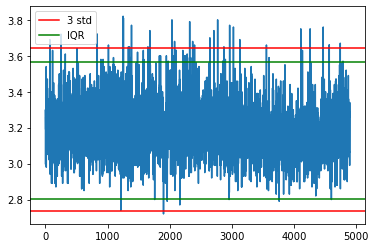

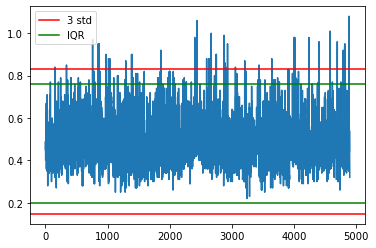

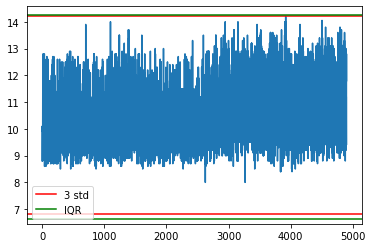

In [62]:
for i in range(data_df.shape[1]-1):

    feature = data_df.iloc[:, i]
    mean = feature.mean()
    std = feature.std()
    
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound_1 = q1 - (iqr * 1.5)
    upper_bound_1 = q3 + (iqr * 1.5)

    plt.figure()
    plt.plot(feature)
    plt.axhline(y=upper_limit, color='r', linestyle='-', label = "3 std")
    plt.axhline(y=lower_limit, color='r', linestyle='-')
    
    plt.axhline(y=lower_bound_1, color='g', linestyle='-', label = "IQR")
    plt.axhline(y=upper_bound_1, color='g', linestyle='-')
    plt.legend()
    plt.show()
    
    for j in range(len(feature)):
        if feature[j] > upper_limit:
            data_df.iloc[j,i] = upper_limit
        if feature[j] < lower_limit:
            data_df.iloc[j,i] = lower_limit
            

In [41]:
prepared_df = data_df_2c.copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [42]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       658
           1       0.95      0.88      0.91       646

    accuracy                           0.92      1304
   macro avg       0.92      0.92      0.92      1304
weighted avg       0.92      0.92      0.92      1304



In [46]:
X_shuffle, y_shuffle = shuffle(X, y, random_state=2)

scores_accuracy = cross_val_score(rf, X_shuffle, y_shuffle, scoring="accuracy",cv=5, n_jobs=1)
scores_precision = cross_val_score(rf, X_shuffle, y_shuffle, scoring="precision",cv=5, n_jobs=1)
scores_recall = cross_val_score(rf, X_shuffle, y_shuffle, scoring="recall",cv=5, n_jobs=1)
scores_f1 = cross_val_score(rf, X_shuffle, y_shuffle, scoring="f1",cv=5, n_jobs=1)


print(f"accuracy: {scores_accuracy.mean()}")
print(f"precision: {scores_precision.mean()}")
print(f"recall: {scores_recall.mean()}")
print(f"f1: {scores_f1.mean()}")

accuracy: 0.9120631247380985
precision: 0.9529645644482694
recall: 0.8674069152695711
f1: 0.9091158374922994


### Pristup sa redukovanim brojem parametara

In [63]:
prepared_df = data_df_2c.iloc[:, [6,5,3,10,11]].copy()
y = prepared_df.pop('quality')
X = prepared_df
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [64]:
rf = RandomForestClassifier(n_estimators=100, bootstrap='False', oob_score='True')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Report:\n", metrics.classification_report(y_test, y_pred))

Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       669
           1       0.95      0.85      0.90       635

    accuracy                           0.91      1304
   macro avg       0.91      0.91      0.91      1304
weighted avg       0.91      0.91      0.91      1304



## Zaključak
U ovom domaćem zadatku prikazano je korišćenje većeg broja klasifikatora kao što su SVM, Random Forest, KNN i NaiveBayes. Cilj ovog rada je bio odrediti kvalitet belog vina na osnovu određenih fizičko-hemijskih karakteristika. Glavni problemi na koje smo naišli prilikom izrade bili su nebalansiranost klasa i velika količina outlier-a. Primenjeno je nekoliko različitih tehnika: balansiranje podataka (pristup sa dve i sa tri klase), outlier detection (IQR, standardna devijacija) i feature selection(VarianceThreshold, Recursive Feature Elimination, Hitmapa matrice korelacije atributa), kako bi se ovi problemi rešili i kako bi se poboljšali klasifikatori. Zaključili smo da najbolje rezultate daje Random Forest klasifikator, s tim što i SVM klasifikator daje relativno slične rezultate.